<a href="https://colab.research.google.com/github/T1G3RR/My-Stuff/blob/master/Anime_Image_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#here is the pseudo code for this plan
# we need to now have a for loop go through and get the specific number for each character then find the characters name
#add that name to the url and then parse through that html page
#that html page will contain a table of pictures of the character andh all we need to do is run another for loop and store that url

# Webscraping


## Create CSV file

### Subsubheading

In [6]:
#create csv file
import pandas as pd
df = pd.DataFrame(columns=["Image URLs", "Name"])
df.to_csv("image_urls.csv", index=False)
print(df)

Empty DataFrame
Columns: [Image URLs, Name]
Index: []


In [7]:
#get url and imports
from bs4 import BeautifulSoup
import requests
import pandas as pd



url = 'https://myanimelist.net/character/'

#get page links
characterNum = [45627, 40, 71, 62]
characterPage = []
for x in characterNum:
  characterPage.append(url + str(x) + '/')

#getting pic page url

imgPage = []
names_list = []
for y in characterPage:
  result = requests.get(y)
  doc = BeautifulSoup(result.text, "html.parser")

  names = doc.find_all("title")[0]

  for x in names:
    index = x.index('(')
    x = x[1:index]
    temp = x.split()
    names_list.append(x)
    links = y + temp[0] + '/pics'
    links.replace(" ", "")
    imgPage.append(links)

#searching pages for image url

for index, value in enumerate(imgPage):


  imgPageParser = requests.get(value)
  script = BeautifulSoup(imgPageParser.text, "html.parser")

  pp = script.find_all("tr")



  #getting image urls and saving them to csv file

  image_urls = []

  for tr in pp:
      img_tag = tr.find("img")
      if img_tag:
          image_url = img_tag["data-src"]
          if (img_tag["class"][0] == "portrait-225x350"):
            image_urls.append(image_url)


  # Create a Pandas DataFrame with the image URLs
  df = pd.DataFrame({"Image URLs": image_urls, "Name": names_list[index]})

  # Save the DataFrame to a CSV file
  df.to_csv("image_urls.csv", index=False, mode= "a", header = False)

  print("Image URLs saved in image_urls.csv file.")

Image URLs saved in image_urls.csv file.
Image URLs saved in image_urls.csv file.
Image URLs saved in image_urls.csv file.
Image URLs saved in image_urls.csv file.


In [ ]:
data = pd.read_csv("/content/image_urls.csv")
data.head(60)

,Image URLs,Name
0,https://cdn.myanimelist.net/images/characters/...,Levi
1,https://cdn.myanimelist.net/images/characters/...,Levi
2,https://cdn.myanimelist.net/images/characters/...,Levi
3,https://cdn.myanimelist.net/images/characters/...,Levi
4,https://cdn.myanimelist.net/images/characters/...,Levi
5,https://cdn.myanimelist.net/images/characters/...,Levi
6,https://cdn.myanimelist.net/images/characters/...,Levi
7,https://cdn.myanimelist.net/images/characters/...,Levi
8,https://cdn.myanimelist.net/images/characters/...,Levi
9,https://cdn.myanimelist.net/images/characters/...,Luffy Monkey D.


In [ ]:
#download images and put them in personal folders
from PIL import Image
from io import BytesIO
import os
import numpy as np

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("/content/image_urls.csv")

# Assuming your image URLs are in a column named 'ImageURL', adjust this according to your dataset
imageURL = df['Image URLs'].to_numpy()
print(imageURL)

characterName = df["Name"].to_numpy()
print(characterName)

['https://cdn.myanimelist.net/images/characters/2/241413.jpg'
 'https://cdn.myanimelist.net/images/characters/4/205157.jpg'
 'https://cdn.myanimelist.net/images/characters/11/234165.jpg'
 'https://cdn.myanimelist.net/images/characters/16/273239.jpg'
 'https://cdn.myanimelist.net/images/characters/13/273265.jpg'
 'https://cdn.myanimelist.net/images/characters/6/307084.jpg'
 'https://cdn.myanimelist.net/images/characters/16/339170.jpg'
 'https://cdn.myanimelist.net/images/characters/6/343711.jpg'
 'https://cdn.myanimelist.net/images/characters/11/419516.jpg'
 'https://cdn.myanimelist.net/images/characters/9/310307.jpg'
 'https://cdn.myanimelist.net/images/characters/9/55741.jpg'
 'https://cdn.myanimelist.net/images/characters/7/71304.jpg'
 'https://cdn.myanimelist.net/images/characters/2/257253.jpg'
 'https://cdn.myanimelist.net/images/characters/9/310307.jpg'
 'https://cdn.myanimelist.net/images/characters/7/350423.jpg'
 'https://cdn.myanimelist.net/images/characters/8/434007.jpg'
 'htt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1. navigate to every url and download image
#2. check if the name is still the same/ pick a name from characterName and check if the list's name is the same
#if not the same, create new folder and start saving the following images in the next folder
#transfer learning techniques

#audio check: convert to text

In [8]:
def folderCreate(currentName):
  if not os.path.exists(currentName):
    os.mkdir(currentName)
    print("Folder %s created!" % currentName)
  else:
    print("Folder %s already exists" % currentName)

In [ ]:
import os
import requests

def download_image(url, folder_path):
    # Create the folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)

    # Get the image content from the URL
    response = requests.get(url)

    # Extract the image file name from the URL
    file_name = os.path.join(folder_path, os.path.basename(url))

    # Save the image content to a file
    with open(file_name, "wb") as file:
        file.write(response.content)

# Example usage


characterAnalyze = characterName[0]
path = '/content/drive/MyDrive/AI Folder/Anime Character Recog/Images'
for index, link in enumerate(imageURL):
  if(characterAnalyze == characterName[index]):
    image_url = link  # Replace with the actual image URL
    save_folder = os.path.join(path, characterAnalyze)  # Replace with the desired folder path
    download_image(image_url, save_folder)
  else:
    characterAnalyze = characterName[index]
    image_url = link  # Replace with the actual image URL
    save_folder = os.path.join(path, characterAnalyze)  # Replace with the desired folder path
    download_image(image_url, save_folder)

In [ ]:
import os
import shutil
import random

# Set up paths
source_folder = '/content/drive/MyDrive/AI Folder/Anime Character Recog/Images'
train_folder = '/content/drive/MyDrive/AI Folder/Anime Character Recog/train'
test_folder = '/content/drive/MyDrive/AI Folder/Anime Character Recog/test'
split_ratio = 0.8  # 80-20 split

# Recursively get a list of image files from all subfolders
def get_image_files(folder):
    image_files = []
    for root, dirs, files in os.walk(folder):
        image_files.extend([os.path.join(root, f) for f in files if f.endswith('.jpg') or f.endswith('.png')])
    return image_files

# Create corresponding subfolders in the destination
def create_destination_subfolders(source_path, destination_path):
    relative_path = os.path.relpath(source_path, source_folder)
    destination_subfolder = os.path.join(destination_path, relative_path)
    if not os.path.exists(destination_subfolder):
        os.makedirs(destination_subfolder)

# Move images while maintaining folder structure
def move_images(source_files, destination_folder):
    for source_file in source_files:
        create_destination_subfolders(source_file, destination_folder)
        destination_file = os.path.join(destination_folder, os.path.relpath(source_file, source_folder))
        shutil.copy(source_file, destination_file)

# Get all image files from source subfolders
image_files = get_image_files(source_folder)

# Randomly shuffle if needed
random.shuffle(image_files)

# Split images
train_count = int(split_ratio * len(image_files))
train_files = image_files[:train_count]
test_files = image_files[train_count:]

# Move images to train and test folders while maintaining structure
move_images(train_files, train_folder)
move_images(test_files, test_folder)

In [ ]:
# Data Augmentation

# Data Augmentation

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Define paths
original_data_dir = '/content/drive/MyDrive/AI Folder/Anime Character Recog/Images'  # Directory containing your original images
augmented_data_dir = '/content/drive/MyDrive/AI Folder/Anime Character Recog/Aug-Images'  # Directory to save augmented images
os.makedirs(augmented_data_dir, exist_ok=True)

# Create an ImageDataGenerator with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loop through the original images and generate augmented images
for root, _, files in os.walk(original_data_dir):
    for filename in files:
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Filter for image files
            original_image_path = os.path.join(root, filename)
            relative_path = os.path.relpath(original_image_path, original_data_dir)
            output_folder = os.path.join(augmented_data_dir, os.path.dirname(relative_path))
            os.makedirs(output_folder, exist_ok=True)

            img = load_img(original_image_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)

            # Generate augmented images and save them
            i = 0
            for batch in datagen.flow(x, batch_size=1):
                augmented_img = array_to_img(batch[0])
                augmented_image_path = os.path.join(output_folder, f'augmented_{i}_{filename}')
                augmented_img.save(augmented_image_path)
                i += 1
                if i >= 10:  # Adjust the number of augmented images per original image
                    break

print("Augmentation complete. Augmented images saved in", augmented_data_dir)

Augmentation complete. Augmented images saved in /content/drive/MyDrive/AI Folder/Anime Character Recog/Aug-Images


In [10]:
# Please replace the brackets below with the drive location of your folders which included subfolders for images
# Sample path: /content/drive/My Drive/ImageClassification
Path = '/content/drive/MyDrive/AI Folder/Anime Character Recog/Aug-Images'

In [11]:
def create_model(base_model, num_classes):
    import tensorflow as tf
    # Grab the last layer and add a few extra layers to it
    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    # Dense layer 1
    x=tf.keras.layers.Dense(100,activation='relu', kernel_initializer=tf.keras.initializers.VarianceScaling(), use_bias=True)(x)

    # Final layer with softmax activation
    preds=tf.keras.layers.Dense(num_classes,activation='softmax', kernel_initializer=tf.keras.initializers.VarianceScaling(), use_bias=False)(x)

    # Create the final model
    model=Model(inputs=base_model.input,outputs=preds)
    return model

In [12]:
def get_optimizer(optimizer_name, learning_rate):
    # Import keras optimizers
    from tensorflow.keras.optimizers import Adam, Adadelta, Adagrad, Adamax, Ftrl, Nadam, RMSprop, SGD
    print('Selected Optimizer', optimizer_name)
    switcher = {
        'Adadelta': Adadelta(learning_rate=learning_rate),
        'Adagrad': Adagrad(learning_rate=learning_rate),
        'Adam': Adam(learning_rate=learning_rate),
        'Adamax': Adamax(learning_rate=learning_rate),
        'FTRL': Ftrl(learning_rate=learning_rate),
        'NAdam': Nadam(learning_rate=learning_rate),
        'RMSprop': RMSprop(learning_rate=learning_rate),
        'Gradient Descent': SGD(learning_rate=learning_rate)
    }
    # If optimizer_name is empty, Adam will be return as default optimizer
    return switcher.get(optimizer_name, Adam(learning_rate=learning_rate))


In [ ]:
pip install tensorflow

In [16]:

# Import packages needed to create a image classification model
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.callbacks import EarlyStopping
from tensorflow import keras

# Initialize hyper params
epochs = 6 #<-- increase for higher accuracy
base_learning_rate = 0.001 #decrease for different results; use excel sheet to note down results from each change to learning rate and epochs
optimizer = 'Adam'
BATCH_SIZE = 23

IMG_SIZE = (224, 224)

# Create the data generation pipeline for training and validation
# train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2) # set validation split
train_generator = train_datagen.flow_from_directory(Path,
                                                target_size=IMG_SIZE,
                                                color_mode='rgb',
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                shuffle=True,
                                                subset='training'
                                                )
validation_generator = train_datagen.flow_from_directory(Path,
                                                target_size=IMG_SIZE,
                                                color_mode='rgb',
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                shuffle=True,
                                                subset='validation'
                                                )

print(validation_generator.class_indices.keys())
# Download the model, valid alpha values [0.25,0.35,0.5,0.75,1]
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet', alpha=0.35)
for layer in base_model.layers:
    layer.trainable=False

# Specify the number of classes
num_classes = 4

# Create the base model
model = create_model(base_model,num_classes)

print(len(base_model.layers))

model.compile(optimizer = get_optimizer(optimizer_name=optimizer,learning_rate=base_learning_rate),loss='CategoricalCrossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=30,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
# step_size_train = 5
# step_size_train = train_generator.n//train_generator.batch_size
history_fine = model.fit(train_generator,
                        epochs=epochs,
                        validation_data = validation_generator,
                        verbose=1)

Found 288 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
dict_keys(['L Lawliet ', 'Levi ', 'Luffy Monkey D. ', 'Zoro Roronoa '])
154
Selected Optimizer Adam
Epoch 1/6
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 737ms/step - accuracy: 0.4617 - loss: 1.2047 - val_accuracy: 0.6667 - val_loss: 0.8290
Epoch 2/6
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 428ms/step - accuracy: 0.8039 - loss: 0.6051 - val_accuracy: 0.9444 - val_loss: 0.4422
Epoch 3/6
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step - accuracy: 0.9583 - loss: 0.2966 - val_accuracy: 0.9583 - val_loss: 0.2841
Epoch 4/6
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 520ms/step - accuracy: 0.9759 - loss: 0.1862 - val_accuracy: 0.9722 - val_loss: 0.2372
Epoch 5/6
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step - accuracy: 0.9823 - loss: 0.1216 - val_accuracy: 0.9722 - val_loss: 0.1724
Epoch 6/6
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 552ms/step - accuracy: 1.0000 - loss: 0.0624 - val_accuracy: 0.9722 - val_loss: 0.1431


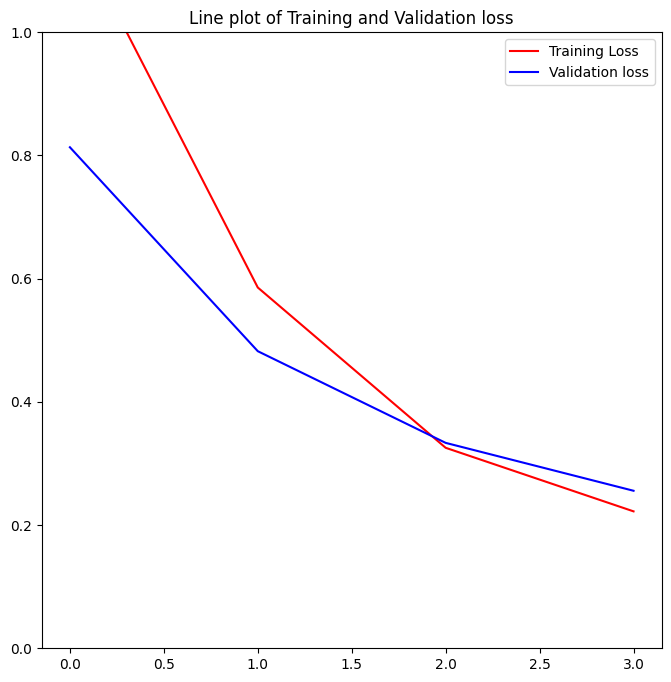

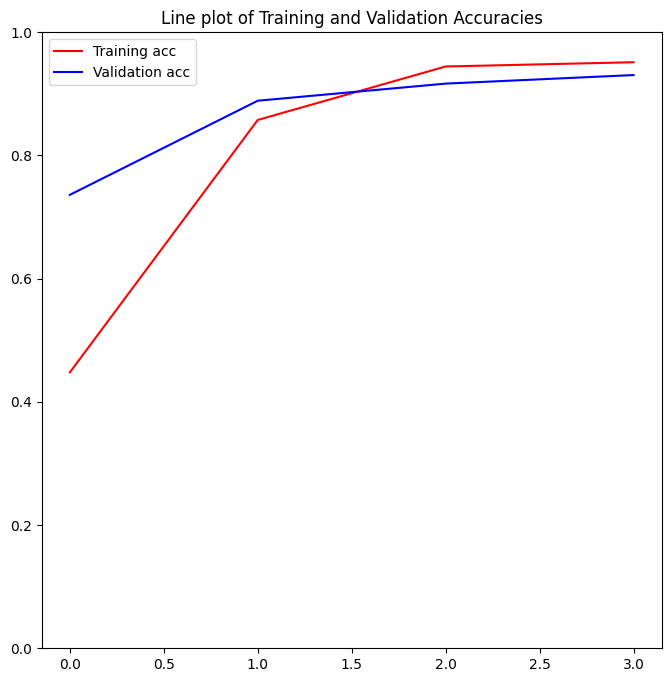

In [ ]:
def visualization():
    import pandas as pd
    df = pd.DataFrame(history_fine.history)
    #loss plots
    plt.figure(figsize=(8,8))
    plt.plot(df['loss'], color='red', label = "Training_loss")
    plt.plot(df['val_loss'], color='blue')
    plt.legend(['Training Loss','Validation loss'],loc = 'best' )
    plt.title('Line plot of Training and Validation loss')
    plt.ylim(0,1)
    plt.show()

    #accuracy plots
    plt.figure(figsize=(8,8))
    plt.plot(df['accuracy'], color='red')
    plt.plot(df['val_accuracy'], color='blue')
    plt.legend(['Training acc','Validation acc'],loc = 'best' )
    plt.title('Line plot of Training and Validation Accuracies')
    plt.ylim(0,1)
    plt.show()

visualization()

In [ ]:

# Import numpy for calculating best model accuracy
import numpy as np
# Populating matrics -> accuracy & loss
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

print('Training Accuracy: ', acc)
print('Validation Accuracy: ', val_acc)
print('Training Loss: ', loss)
print('Validation Loss: ', val_loss)
best_model_accuracy = history_fine.history['val_accuracy'][np.argmin(history_fine.history['val_loss'])]
print('best model accuracy: ', best_model_accuracy)


Training Accuracy:  [0.4479166567325592, 0.8576388955116272, 0.9444444179534912, 0.9513888955116272]
Validation Accuracy:  [0.7361111044883728, 0.8888888955116272, 0.9166666865348816, 0.9305555820465088]
Training Loss:  [1.1794602870941162, 0.5856754779815674, 0.32545551657676697, 0.2222696989774704]
Validation Loss:  [0.8133498430252075, 0.4822884202003479, 0.33345600962638855, 0.255707323551178]
best model accuracy:  0.9305555820465088


In [ ]:
def seperate_labels(generator):
    x_validation = []
    y_validation = []
    num_seen = 0

    for x, labels in generator:
        x_validation.append(x)
        y_validation.append([argmax(label) for label in labels])
        num_seen += len(x)
        if num_seen == generator.n: break

    x_validation = np.concatenate(x_validation)
    y_validation = np.concatenate(y_validation)
    return x_validation, y_validation


In [ ]:

# Calculate and display the confusion matrix
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import argmax
from sklearn.metrics import ConfusionMatrixDisplay

x_validation, y_validation = seperate_labels(validation_generator)
y_pred = model.predict(x_validation, batch_size=BATCH_SIZE)
predictions = np.apply_along_axis(argmax, 1, y_pred)
display_labels = validation_generator.class_indices.keys()

# ConfusionMatrixDisplay.from_predictions(y_validation, predictions, display_labels=display_labels, cmap="binary")
# plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step


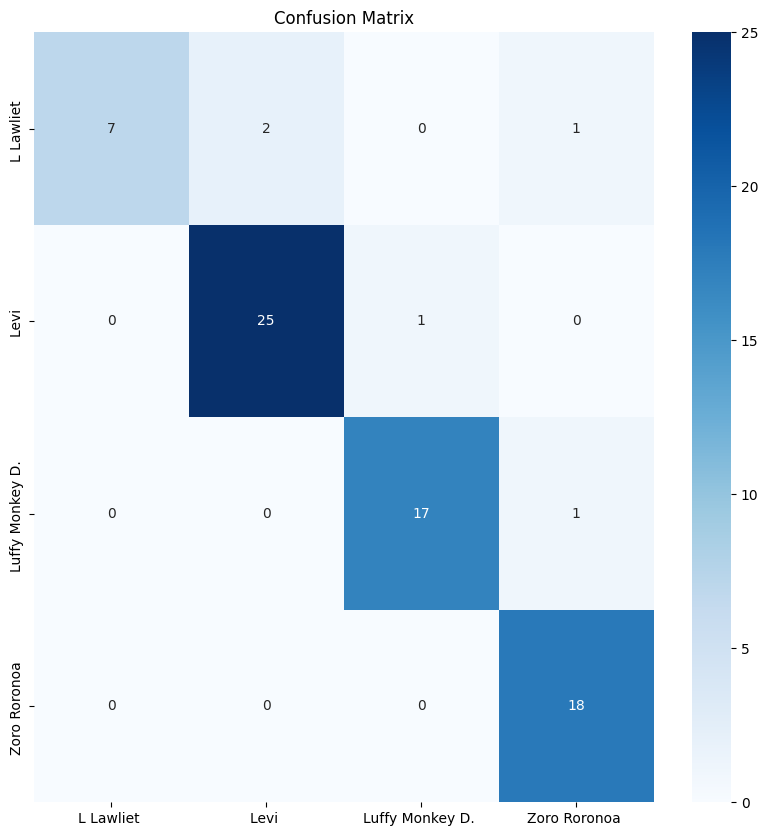

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(y_validation, predictions), annot = True, fmt = 'g', cmap = "Blues",xticklabels=display_labels, yticklabels=display_labels)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.93      0.96      0.94        26
           2       0.94      0.94      0.94        18
           3       0.90      1.00      0.95        18

    accuracy                           0.93        72
   macro avg       0.94      0.90      0.91        72
weighted avg       0.93      0.93      0.93        72



In [30]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input


# Get image path from user input
img_path = input("Please enter the path to the image: ")

# Check if the file exists
if os.path.exists(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)  # Adds a batch dimension
    img_preprocessed = preprocess_input(img_batch)

    # Predict using the model
    prediction = model.predict(img_preprocessed)

    # Output the prediction
    classes = ['LLawliet', 'Levi', 'Luffy', 'Zoro']  # Replace with actual class names
    predicted_class = classes[np.argmax(prediction)]
    print(f'Predicted Class: {predicted_class}')
else:
    print(f"File not found at {img_path}. Please check the path and try again.")


Please enter the path to the image: /content/drive/MyDrive/AI Folder/Anime Character Recog/test/L Lawliet /249647.jpg/249647.jp
File not found at /content/drive/MyDrive/AI Folder/Anime Character Recog/test/L Lawliet /249647.jpg/249647.jp. Please check the path and try again.
